### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset
import librosa

### Load data

In [2]:
# spectrogram
spects = Dataset.from_parquet("data/vocal_spectrograms.parquet")
# mfccs
mfccs = Dataset.from_parquet("data/vocal_mfcc.parquet")
# phenotypes
phen_df = pd.read_csv("data/vocal_phenotype.tsv", sep="\t", header=0)
# static features
static_df = pd.read_csv("data/vocal_static_features.tsv", sep="\t", header=0)

### Tasks

In [3]:
static_df["task_name"].unique()

array(['Audio-Check-1', 'Audio-Check-2', 'Audio-Check-3', 'Audio-Check-4',
       'Cape-V-sentences-1', 'Cape-V-sentences-2', 'Cape-V-sentences-3',
       'Cape-V-sentences-4', 'Cape-V-sentences-5', 'Cape-V-sentences-6',
       'Caterpillar-Passage', 'Diadochokinesis-KA', 'Diadochokinesis-PA',
       'Diadochokinesis-Pataka', 'Diadochokinesis-TA',
       'Diadochokinesis-buttercup', 'Free-Speech', 'Free-speech-1',
       'Free-speech-2', 'Free-speech-3', 'Glides-High-to-Low',
       'Glides-Low-to-High', 'Loudness', 'Maximum-phonation-time-1',
       'Maximum-phonation-time-2', 'Maximum-phonation-time-3',
       'Picture-description', 'Prolonged-vowel', 'Rainbow-Passage',
       'Respiration-and-cough-Breath-1', 'Respiration-and-cough-Breath-2',
       'Respiration-and-cough-Cough-1', 'Respiration-and-cough-Cough-2',
       'Respiration-and-cough-FiveBreaths-1',
       'Respiration-and-cough-FiveBreaths-2',
       'Respiration-and-cough-FiveBreaths-3',
       'Respiration-and-cough-Fiv

### Take a look at some data for different tasks

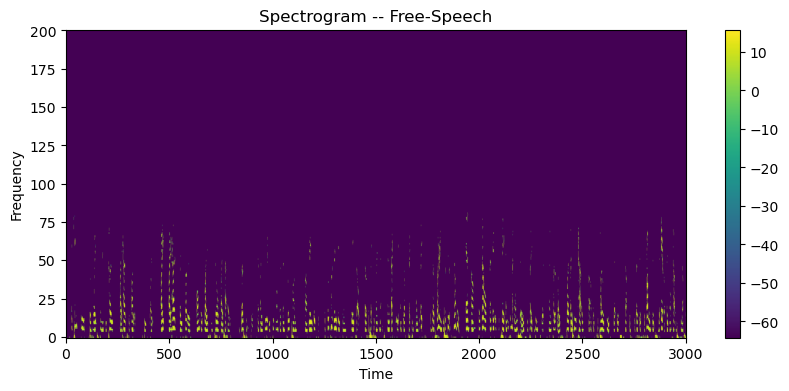

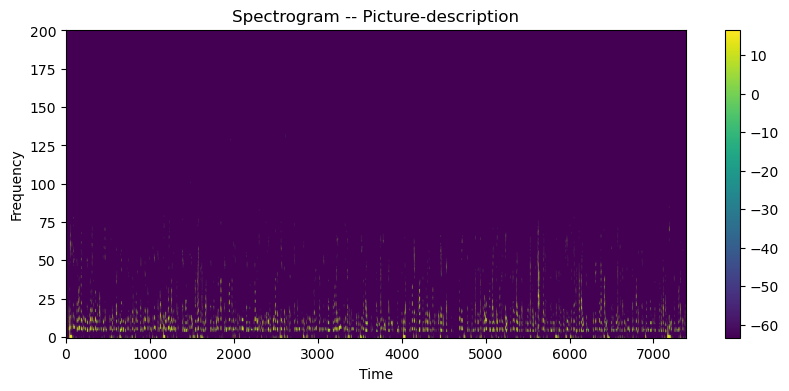

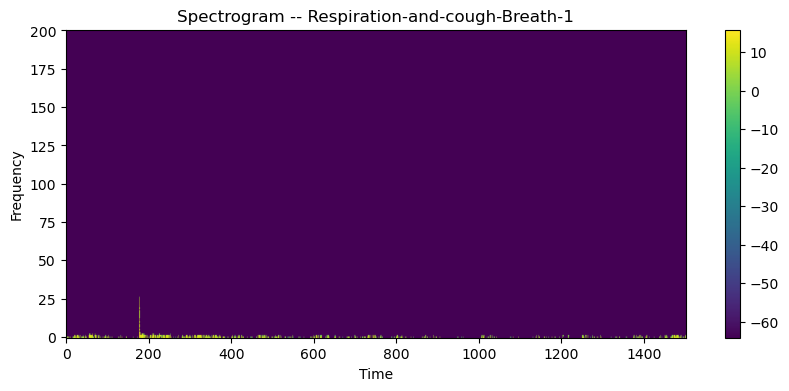

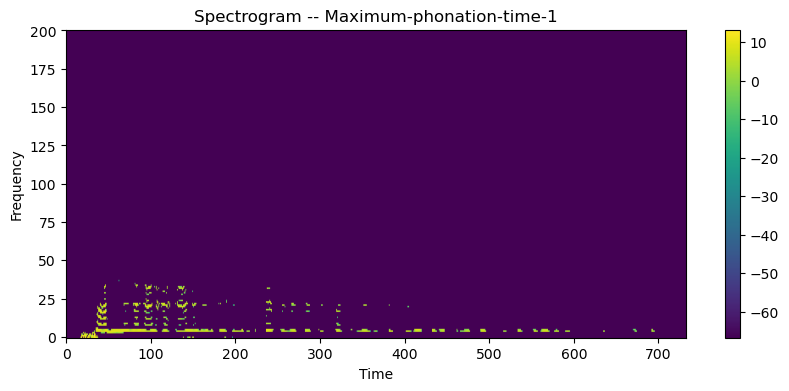

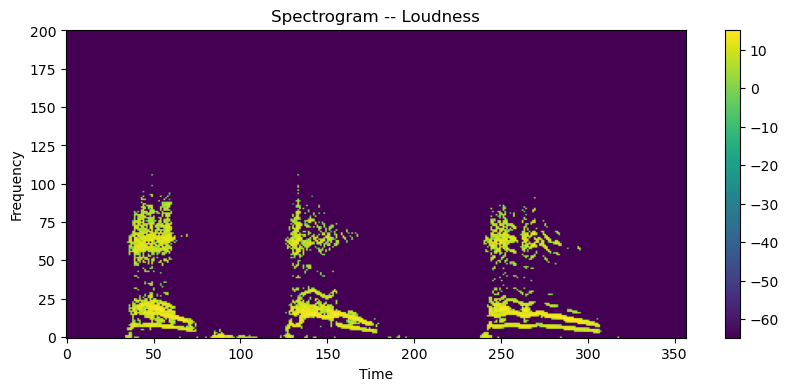

In [43]:
# let's take a look at the spectrograms for some different tasks
tasks = [
    "Free-Speech", 
    "Picture-description", 
    "Respiration-and-cough-Breath-1",
    "Maximum-phonation-time-1",
    "Loudness"
]
for t in tasks:
    s = None 
    for s in spects:
        if s["task_name"] == t:
            break
    spectrogram = librosa.power_to_db(np.asarray(s['spectrogram']))
    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram, aspect='auto', origin='lower')
    plt.title(f'Spectrogram -- {t}')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar()

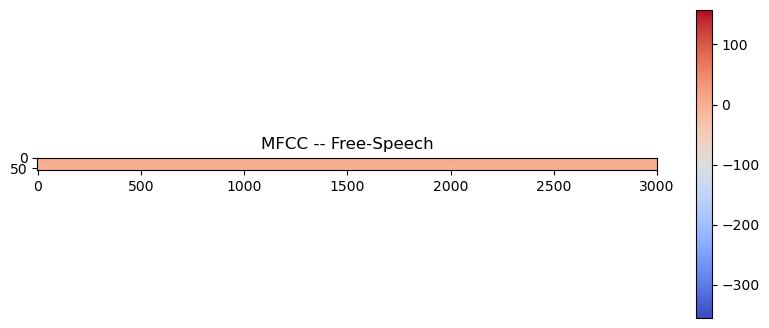

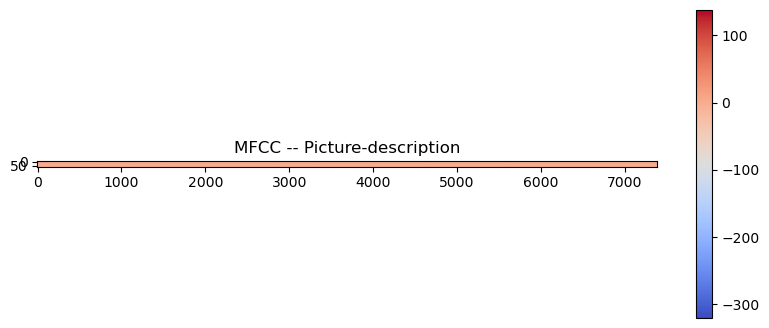

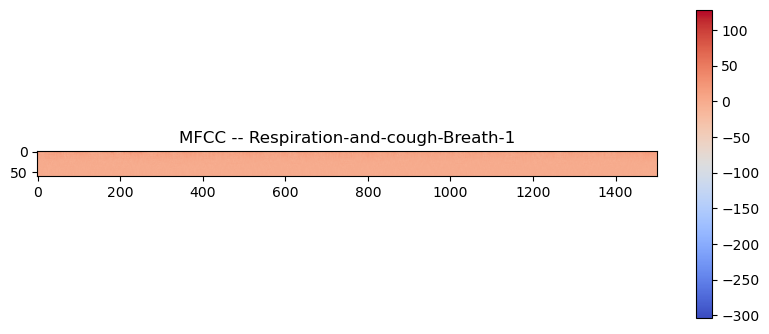

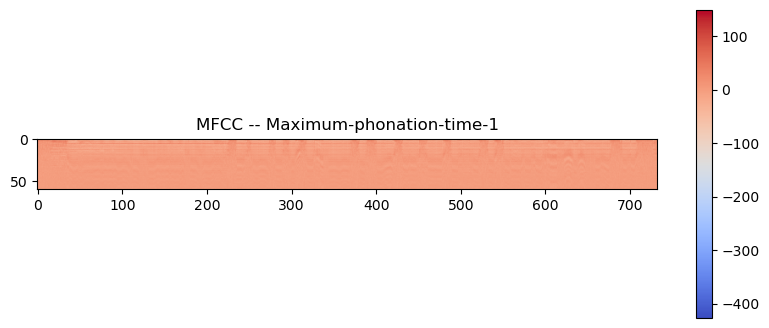

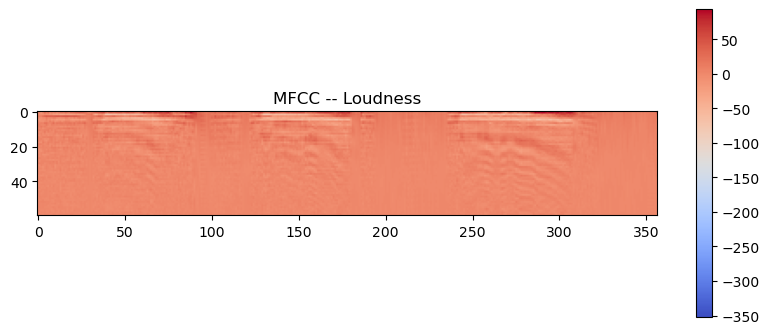

In [50]:
for t in tasks:
    m = None 
    for m in mfccs:
        if m["task_name"] == t:
            break
    plt.figure(figsize=(10, 4))
    plt.imshow(np.array(m["mfcc"]), cmap="coolwarm")
    plt.title(f'MFCC -- {t}')
    plt.colorbar()

#### Static features

In [52]:
static_df[static_df.task_name=="Free-Speech"]

,participant_id,session_id,task_name,transcription,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,...,ddp_jitter,local_shimmer,localDB_shimmer,apq3_shimmer,apq5_shimmer,apq11_shimmer,dda_shimmer,stoi,pesq,si_sdr
16,016023f6,D171203B,Free-Speech,I came to the voice clinic because I had stacc...,34.584442,0.081811,32.802055,34.411736,36.388584,3.586529,...,0.019754,0.086254,0.817556,0.030218,0.040295,0.074056,0.090655,0.994409,1.873563,3.348506
56,02624589,0943993C,Free-Speech,I have a tremor in my voice which makes it dif...,32.160122,0.041226,31.165535,32.193558,33.114723,1.949188,...,0.018278,0.092595,0.824349,0.026336,0.043573,0.085709,0.079007,0.947254,1.113521,-12.852974
96,02955d67,148783B7,Free-Speech,"As far as I know, I don't have any voice or sp...",30.617311,0.131268,28.408381,30.144049,32.713570,4.305189,...,0.020683,0.094588,0.917500,0.030249,0.046150,0.111327,0.090747,0.997306,3.615716,23.730230
136,02a473a2,0203AC5B,Free-Speech,I don't know. I just want it fixed. Nobody can...,30.696472,0.089422,28.286163,30.619366,31.955797,3.669634,...,0.040560,0.132161,1.200351,0.055896,0.064432,0.083815,0.167687,0.888289,1.359555,-1.495411
176,03252baf,4EA6AAA2,Free-Speech,NaN,21.233414,0.180032,19.574837,20.668083,22.149597,2.574760,...,0.020158,0.084072,0.776109,0.029153,0.043516,0.073628,0.087458,0.994028,2.452479,3.851059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,fa6befa4,4A558493,Free-Speech,NaN,27.756289,0.118146,25.999866,27.404772,29.224697,3.224831,...,0.042755,0.136257,1.202270,0.057362,0.074530,0.125438,0.172085,0.994898,2.836494,12.005452
9345,fbf55cc0,084AEF8E,Free-Speech,My voice is always hoarse. I cough constantly....,27.617640,0.214722,19.166113,30.168398,31.873653,12.707541,...,0.045304,0.103114,1.106097,0.034380,0.047113,0.082267,0.103139,0.958075,3.252905,17.113115
9421,fe6cefa7,6A47F76E,Free-Speech,I was having problems with hoarseness in my vo...,31.951050,0.070081,30.499372,32.264046,33.801929,3.302557,...,0.023950,0.113133,1.129527,0.043187,0.059363,0.102138,0.129560,0.902967,1.728405,8.825559
9465,ff58dff0,A5484A20,Free-Speech,NaN,20.794083,0.092597,19.535559,20.303299,21.386452,1.850893,...,0.032043,0.084605,0.808255,0.026980,0.040539,0.077066,0.080939,0.999584,3.731647,26.366699
